# QUANTUM PHASE ESTIMATION

## IMPORTS and SETUP

In [3]:
# general imports
import numpy as np
import math
import matplotlib.pyplot as plt
# magic word for producing visualizations in notebook
%matplotlib inline

# AWS imports: Import Amazon Braket SDK modules
from braket.circuits import Circuit, circuit
from braket.devices import LocalSimulator
from braket.aws import AwsDevice

# local imports
from utils_qpe import qpe, run_qpe,postprocess_qpe_results

%load_ext autoreload
%autoreload 2

In [4]:
# set up device: local simulator or the on-demand simulator
device = LocalSimulator()
#device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")

### Pauli Matrices:
In some of our examples, we choose the unitary $U$ to be given by the **Pauli Matrices**, which we thus define as follows:

In [5]:
# Define Pauli matrices
Id = np.eye(2)             # Identity matrix
X = np.array([[0., 1.],
              [1., 0.]])   # Pauli X
Y = np.array([[0., -1.j],
              [1.j, 0.]])  # Pauli Y
Z = np.array([[1., 0.],
              [0., -1.]])  # Pauli Z

In [6]:
# set total number of qubits
precision_qubits = range(10)
query_qubits = [10]

# prepare query register
my_qpe_circ = Circuit().h(query_qubits)

# set unitary
unitary = X

# show small QPE example circuit
my_qpe_circ = my_qpe_circ.qpe(precision_qubits, query_qubits, unitary)
#print('QPE CIRCUIT:')
#print(my_qpe_circ)

In [7]:
out = run_qpe(
    unitary,
    precision_qubits,
    query_qubits,
    my_qpe_circ,
    device,
    items_to_keep=1,
    shots=1000)

Measurement counts: Counter({'00000000000': 513, '00000000001': 487})
Results in precision register: {'0000000000': 1000}
QPE phase estimates: [0.0]
QPE eigenvalue estimates: [1.+0.j]


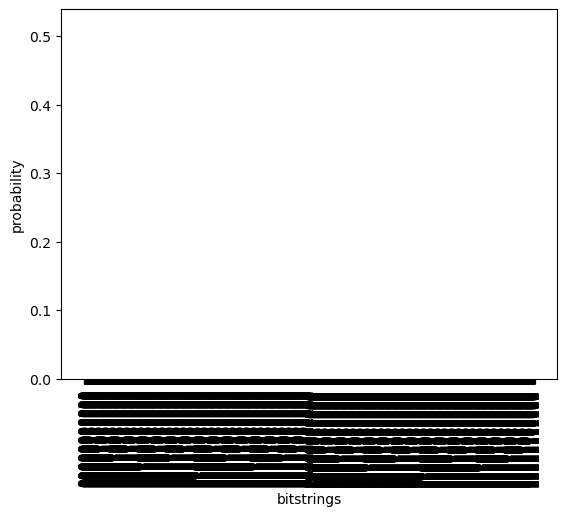

In [8]:
postprocess_qpe_results(out)